# 1. 데이터 생성
- 남자, 여자 데이터 생성 군집화

In [11]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
random.randint(40, 70) # 40~70 중 하나 

57

In [5]:
data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,175)]) # 여자
    data.append([random.randint(60,110), random.randint(170,200)]) # 남자

In [8]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
print('\n------------------')
for male in data[1:100:2]:
    print(male, end=' ')

[69, 158] [60, 165] [56, 153] [51, 148] [43, 141] [49, 143] [51, 175] [45, 155] [51, 163] [53, 165] [62, 159] [47, 142] [65, 172] [60, 162] [42, 143] [57, 168] [55, 169] [68, 175] [47, 164] [41, 158] [43, 166] [61, 147] [50, 143] [59, 152] [44, 152] [68, 158] [56, 150] [45, 147] [46, 174] [63, 154] [60, 166] [68, 171] [47, 172] [68, 141] [40, 171] [55, 148] [43, 146] [53, 165] [61, 142] [54, 166] [50, 159] [53, 154] [64, 159] [70, 149] [58, 141] [57, 145] [43, 148] [46, 166] [44, 154] [67, 173] 
------------------
[90, 192] [85, 199] [96, 170] [103, 195] [62, 182] [75, 170] [89, 195] [103, 185] [107, 192] [96, 184] [76, 185] [93, 176] [75, 172] [77, 189] [96, 172] [100, 175] [66, 179] [70, 173] [84, 195] [79, 172] [73, 186] [95, 191] [86, 181] [62, 179] [110, 184] [88, 172] [62, 187] [84, 197] [67, 185] [62, 185] [78, 180] [79, 189] [84, 195] [101, 181] [100, 196] [61, 189] [77, 191] [108, 175] [62, 181] [81, 200] [107, 178] [105, 173] [72, 173] [96, 181] [92, 188] [74, 194] [98, 181] 

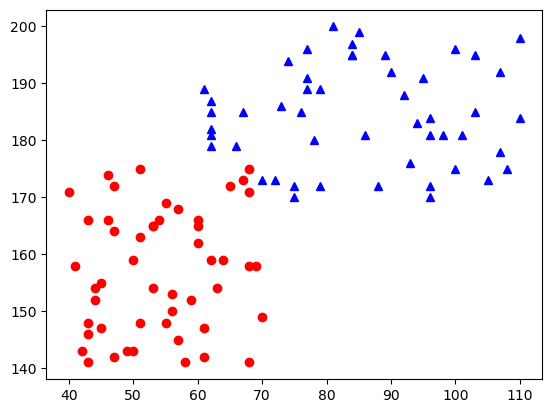

In [16]:
# x : 몸무게 , y:키
# print('여자 몸무게 :', [d[0] for d in data[:100:2]])
# print('여자 신장 :', [d[1] for d in data[:100:2]])
# print('남자 몸무게 :', [d[0] for d in data[1:100:2]])
# print('남자 신장 :', [d[1] for d in data[1:100:2]])
plt.plot([d[0] for d in data[:100:2]],
        [d[1] for d in data[:100:2]], 'o', color='r')
plt.plot([d[0] for d in data[1:100:2]],
        [d[1] for d in data[1:100:2]], '^', color='b')
plt.show()

# 2. 군집화 로직

In [17]:
# 초기 랜덤 지점 2개 (40~110, 140~200)
random_points = [[random.randint(40,110), random.randint(140, 200)],
                [random.randint(40,100), random.randint(140,200)]]
print('초기 랜덤 기준점 :', random_points)

초기 랜덤 기준점 : [[63, 145], [91, 199]]


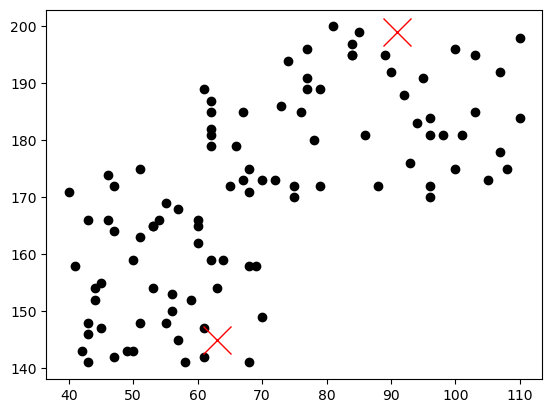

In [21]:
# plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)

In [22]:
# 두 점 사이의 거리를 return하는 함수 a=[0,0] ~ b=[3,4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
dist([1,1], [4,5])

5.0

In [24]:
dist(random_points[0], random_points[1])

60.8276253029822

In [26]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = [] # random_points[0]이 더 가까운 group
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(55, 45)

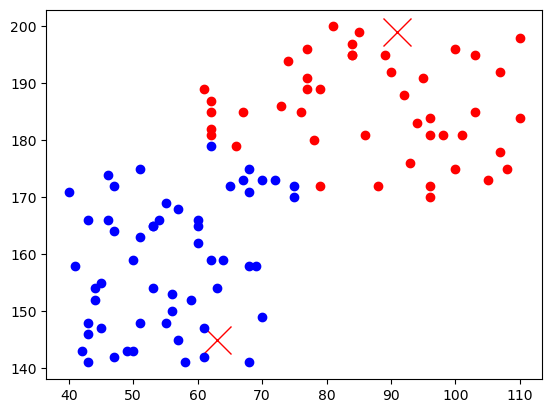

In [28]:
plt.plot(random_points[0][0], random_points[0][1], 'rx', markersize = 20)
plt.plot(random_points[1][0], random_points[1][1], 'rx', markersize = 20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')

In [30]:
print('초기 랜던 지점 :', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points 할당
sumX=0; sumY=0
for g in group0:
    sumX += g[0]
    sumY += g[1]
new_points = []
new_points.append([sumX/len(group0), sumY/len(group0)])
sumX=0; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group1), sumY/len(group1)])
print('새로운 기준점 :', new_points)

초기 랜던 지점 : [[63, 145], [91, 199]]
새로운 기준점 : [[55.67272727272727, 158.61818181818182], [86.95555555555555, 185.64444444444445]]


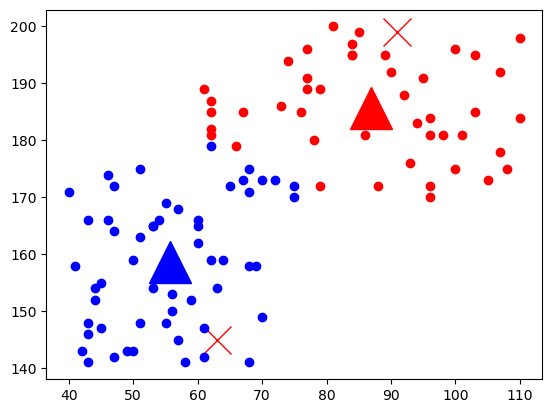

In [31]:
plt.plot(random_points[0][0], random_points[0][1], 'rx', markersize = 20)
plt.plot(random_points[1][0], random_points[1][1], 'rx', markersize = 20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=30)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=30)

In [32]:
# new_points[0]과 new_points[1]을 두 영역으로 나눔 
group0 = []
group1 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(54, 46)

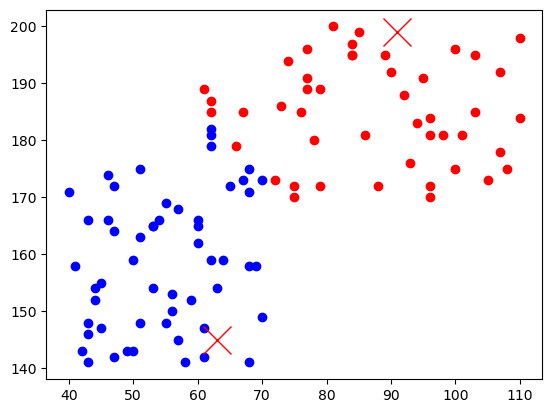

In [34]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(random_points[0][0], random_points[0][1], 'rx', markersize = 20)
plt.plot(random_points[1][0], random_points[1][1], 'rx', markersize = 20)

# 3.전체코드(for문 사용)

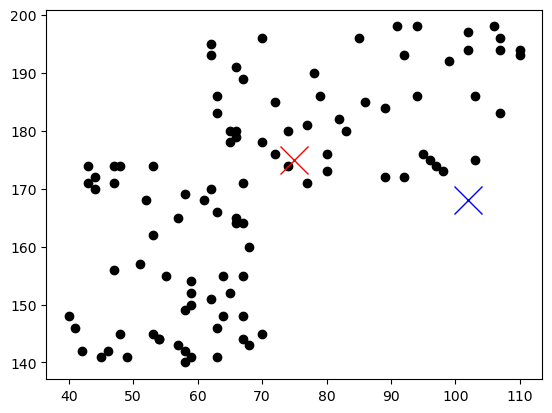

1 번째 기준점 [[102, 168], [75, 175]]
2 번째 기준점 [[100.94444444444444, 185.0], [63.0609756097561, 166.0121951219512]]
3 번째 기준점 [[95.57142857142857, 186.5], [59.888888888888886, 162.79166666666666]]
4 번째 기준점 [[92.57575757575758, 185.84848484848484], [58.701492537313435, 161.34328358208955]]
5 번째 기준점 [[89.10526315789474, 186.3421052631579], [58.096774193548384, 159.06451612903226]]
6 번째 기준점 [[87.02325581395348, 185.25581395348837], [56.94736842105263, 157.49122807017545]]
7 번째 기준점 [[85.14893617021276, 184.85106382978722], [56.339622641509436, 155.75471698113208]]
8 번째 기준점 [[84.72916666666667, 184.70833333333334], [56.17307692307692, 155.32692307692307]]
9 번째 기준점 [[84.72916666666667, 184.70833333333334], [56.17307692307692, 155.32692307692307]]
10 번째 기준점 [[84.72916666666667, 184.70833333333334], [56.17307692307692, 155.32692307692307]]


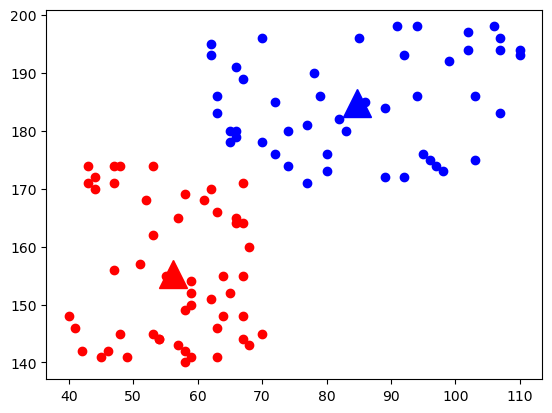

In [41]:
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
data = []
for i in range(50):
    data.append([random.randint(40,70),random.randint(140, 175)]) # 여자
    data.append([random.randint(60,110),random.randint(170, 200)]) # 남자

points = [[random.randint(40,110),random.randint(140,200)],
         [random.randint(40,110), random.randint(140,200)]]

plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
plt.plot(points[0][0], points[0][1], 'x', color='b', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='r', markersize=20)
plt.show()

for i in range(10):
    print(i+1, '번째 기준점', points)
    group0 = [] 
    group1 = [] 
    for d in data:
        if dist(points[0], d) <= dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    
    points = []
    sum_x=0; sum_y=0
    for g in group0:
        sum_x += g[0]
        sum_y += g[1]
    points.append([sum_x/len(group0),sum_y/len(group0)])
    sum_x=0; sum_y=0
    for g in group1:
        sum_x += g[0]
        sum_y += g[1]
    points.append([sum_x/len(group1),sum_y/len(group1)])

plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(points[0][0], points[0][1], '^', color='b', markersize=20)
plt.plot(points[1][0], points[1][1], '^', color='r', markersize=20)
plt.show()

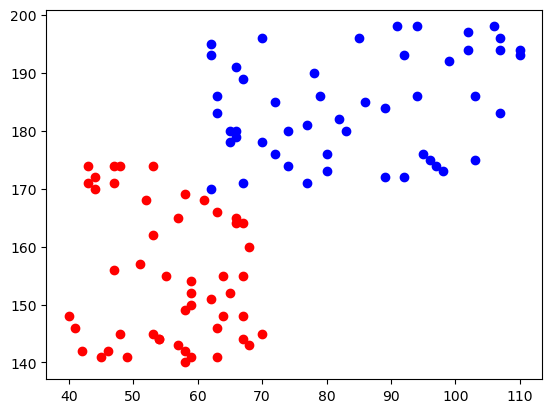

In [47]:
plt.plot([d[0] for d in data[:100:2]], [d[1] for d in data[:100:2]], 'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]], 'o', color='b')

# 4. api(sklearn) 이용한 군집분석
- sklearn : 머신러닝 패키지

In [48]:
from sklearn.cluster import KMeans

In [49]:
data = np.array(data)
model = KMeans(n_clusters=2,
              init='random',
              n_init=10,
              random_state=42)
model.fit(data)

C:\Users\4545\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [50]:
model.cluster_centers_

array([[ 56.17307692, 155.32692308],
       [ 84.72916667, 184.70833333]])

In [51]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [54]:
model.predict(np.array([[89, 199],
                       [50, 160]]))

array([1, 0])

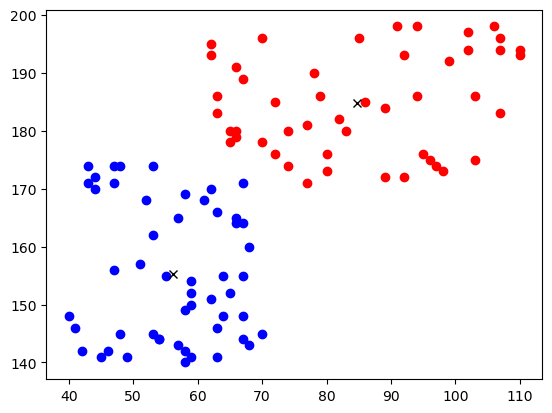

In [61]:
plt.plot(data[model.labels_==1, 0],
        data[model.labels_==1, 1], 'o', color='r')
plt.plot(data[model.labels_==0, 0],
        data[model.labels_==0, 1], 'o', color='b')
plt.plot(model.cluster_centers_[0][0], model.cluster_centers_ [0][1], 'x', color='k')
plt.plot(model.cluster_centers_[1][0], model.cluster_centers_ [1][1], 'x', color='k')